In [31]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


### 이미지 만들기
티처블머신(https://teachablemachine.withgoogle.com/)
- 웹캠으로 이미지를 만들어서 클래스별로 저장(예. scissor.zip, paper.zip, rock.zip)
- 클라우드에 업로드 한 후 압축을 푼다.(aiffel/scissor_rock_paper/scisscor, ...)


In [32]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 그루들의 데이터를 모아서 해보려고 한다.
- 문제 : 이미지 화일 이름이 1, 2, 3, ... 으로 만들어져 있어서 화일명이 겹침.
- 그래서, 이미지 화일을 train폴더에 넣은 후 순회 하면서 이미지 사이즈 조절하기로 함.
- 이미지 화일은 train/이름/paper, train/이름/scissor, train/이름/rock 밑에 넣고 압축 풀면 된다.


In [33]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    #rint(len(images), " images to be resized.")
    #print(type(images[0])) #.shape)
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
start_dir = "~/aiffel/rock_scissor_paper"
start_dir = os.path.expanduser(start_dir)

for subdir, _, _ in os.walk(start_dir):
    image_dir_path =  os.path.abspath(subdir)
    print(image_dir_path)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

/aiffel/aiffel/rock_scissor_paper
0  images resized.
/aiffel/aiffel/rock_scissor_paper/scissor
598  images resized.
/aiffel/aiffel/rock_scissor_paper/rock
535  images resized.
/aiffel/aiffel/rock_scissor_paper/paper
511  images resized.
이미지 resize 완료!


### 데이터 로드
- 가위: 0, 바위: 1, 보:2로 라벨링 됨.
- 최대 500개까지 받고 들어오는 숫자에 맞춰서 데이터 사이즈를 조절하게 코드 변경

In [94]:
import numpy as np
import os

def load_data(img_path, max_number_of_data=10000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(max_number_of_data*img_size*img_size*color,dtype=np.int32).reshape(max_number_of_data,img_size,img_size,color)
    labels=np.zeros(max_number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    imgs = imgs[:idx]
    labels = labels[:idx]

    return imgs, labels

image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print(image_path)

(x_data, y_data)=load_data(image_path)

x_data = x_data/255.0   # 입력은 0~1 사이의 값으로 정규화

# print("x_data shape: {}".format(x_train.shape))
# print("y_train shape: {}".format(y_train.shape))

/aiffel/aiffel/rock_scissor_paper
데이터의 이미지 개수는 1644 입니다.


In [95]:
print(x_data.shape)
print(y_data.shape)

(1644, 28, 28, 3)
(1644,)


In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=16
n_channel_2=32
n_dense_1=64
n_dense_2 = 128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), \
                              activation='relu', \
                              input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(n_dense_1, activation='relu'))
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
#model.add(keras.layers.BatchNormalization())  # Batch Normalization
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_53 (Dense)             (None, 3)               

Training data shape: (1315, 28, 28, 3)
Evaluation data shape: (329, 28, 28, 3)
Epoch 1/10
42/42 [==============================] - 1s 26ms/step - loss: 1.0442 - accuracy: 0.4958 - val_loss: 0.8961 - val_accuracy: 0.6383
Epoch 2/10
42/42 [==============================] - 1s 23ms/step - loss: 0.5706 - accuracy: 0.8274 - val_loss: 0.3936 - val_accuracy: 0.8237
Epoch 3/10
42/42 [==============================] - 1s 22ms/step - loss: 0.2386 - accuracy: 0.9316 - val_loss: 0.1950 - val_accuracy: 0.9392
Epoch 4/10
42/42 [==============================] - 1s 23ms/step - loss: 0.1277 - accuracy: 0.9703 - val_loss: 0.1653 - val_accuracy: 0.9331
Epoch 5/10
42/42 [==============================] - 1s 22ms/step - loss: 0.0781 - accuracy: 0.9848 - val_loss: 0.0819 - val_accuracy: 0.9757
Epoch 6/10
42/42 [==============================] - 1s 22ms/step - loss: 0.0555 - accuracy: 0.9871 - val_loss: 0.0483 - val_accuracy: 0.9909
Epoch 7/10
42/42 [==============================] - 1s 22ms/step - loss: 0.

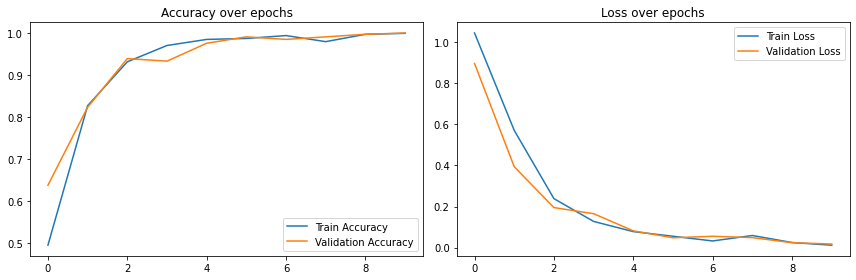

In [134]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 훈련 데이터의 비율
train_ratio = 0.8
train_size = int(x_data.shape[0] * train_ratio)


# 임의의 인덱스 선택
train_indices = np.random.choice(x_data.shape[0], train_size, replace=False)
eval_indices = np.setdiff1d(np.arange(x_data.shape[0]), train_indices)

# 데이터 분할
x_train = x_data[train_indices]
y_train = y_data[train_indices]
x_eval = x_data[eval_indices]
y_eval = y_data[eval_indices]

print(f"Training data shape: {x_train.shape}")
print(f"Evaluation data shape: {x_eval.shape}")

# 3. 훈련 및 평가
history = model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=32, validation_data=(x_eval, y_eval))

# 4. 결과를 그래프로 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.tight_layout()
plt.show()

실제 데이터의 라벨 :  0


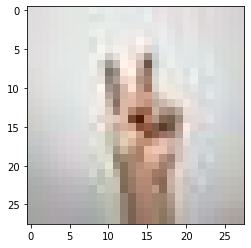

실제 데이터의 라벨 :  2


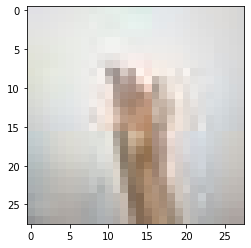

실제 데이터의 라벨 :  2


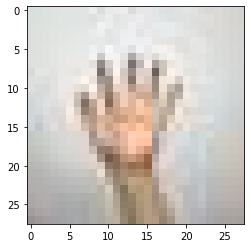

실제 데이터의 라벨 :  2


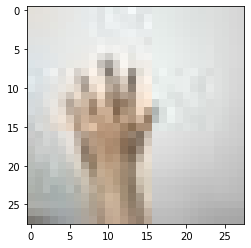

실제 데이터의 라벨 :  2


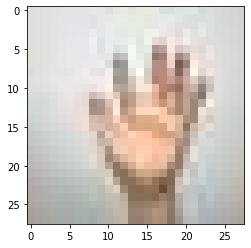

실제 데이터의 라벨 :  1


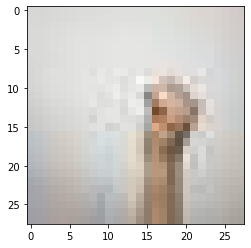

실제 데이터의 라벨 :  0


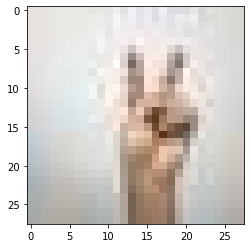

실제 데이터의 라벨 :  2


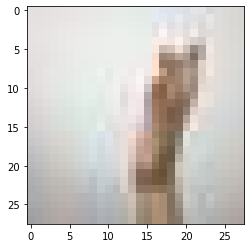

실제 데이터의 라벨 :  0


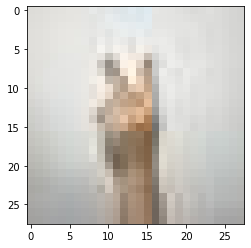

실제 데이터의 라벨 :  2


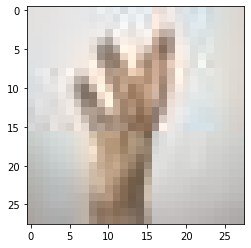

In [115]:
for idx in np.random.choice(x_train.shape[0], 10):
    #idx=150 #1번째 x_test를 살펴보자. 
    print('실제 데이터의 라벨 : ', y_train[idx])

    plt.imshow(x_train[idx])
    plt.show()

model.predict() 결과 :  [0.00669665 0.00287941 0.990424  ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


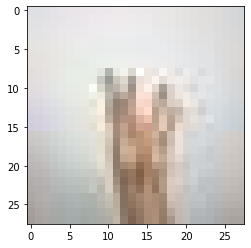

model.predict() 결과 :  [9.9994826e-01 1.2859691e-05 3.8918140e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


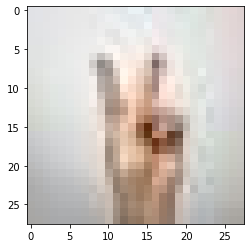

model.predict() 결과 :  [1.2429932e-07 9.9915385e-01 8.4604829e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


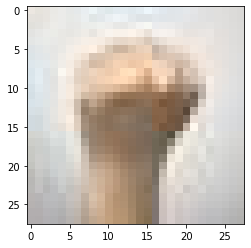

model.predict() 결과 :  [1.7760339e-15 1.0000000e+00 3.6767680e-08]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


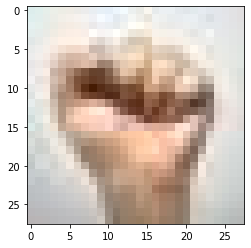

model.predict() 결과 :  [6.0201093e-09 9.9997449e-01 2.5465724e-05]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


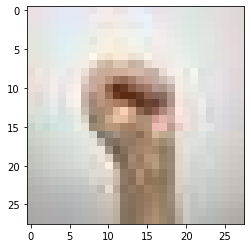

model.predict() 결과 :  [2.3335188e-05 9.9997628e-01 3.2750782e-07]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


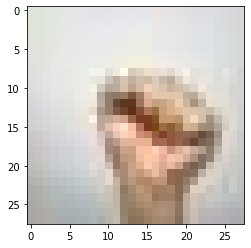

model.predict() 결과 :  [9.9259019e-01 2.6032001e-06 7.4072573e-03]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


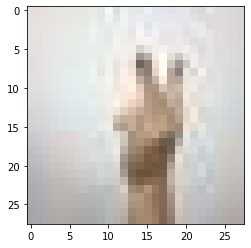

model.predict() 결과 :  [1.4333459e-05 9.4543185e-07 9.9998474e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


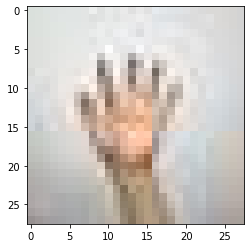

model.predict() 결과 :  [1.0000000e+00 4.4983084e-09 9.8624788e-09]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


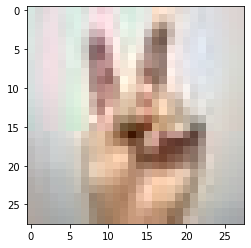

model.predict() 결과 :  [5.5649149e-01 1.4799605e-04 4.4336048e-01]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  2


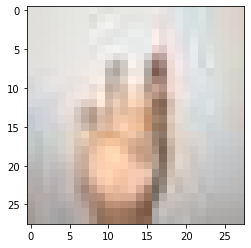

In [116]:
predicted_result = model.predict(x_train)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

for idx in np.random.choice(x_train.shape[0], 10):
    #idx=150 #1번째 x_test를 살펴보자. 
    print('model.predict() 결과 : ', predicted_result[idx])
    print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
    print('실제 데이터의 라벨 : ', y_train[idx])

    plt.imshow(x_train[idx])
    plt.show()

model.predict() 결과 :  [8.5516559e-04 8.7349756e-05 9.9905747e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


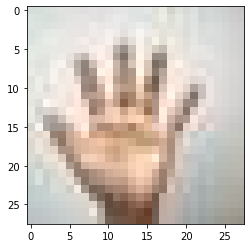

model.predict() 결과 :  [6.6099100e-02 1.3138659e-05 9.3388778e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


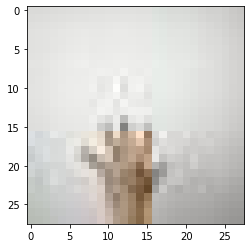

model.predict() 결과 :  [6.7030370e-10 9.7938424e-01 2.0615824e-02]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


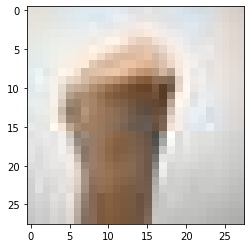

model.predict() 결과 :  [1.5993136e-01 8.1797055e-04 8.3925062e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


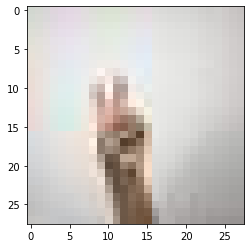

model.predict() 결과 :  [9.9937445e-01 5.5040180e-04 7.5140488e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1


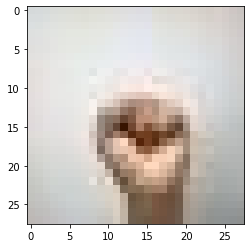

model.predict() 결과 :  [1.4202838e-01 5.9983763e-04 8.5737181e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


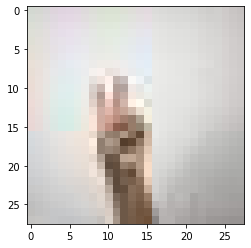

model.predict() 결과 :  [0.00089428 0.5362807  0.462825  ]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  2


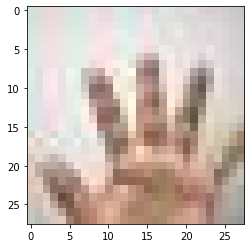

model.predict() 결과 :  [0.03336879 0.0405253  0.9261059 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


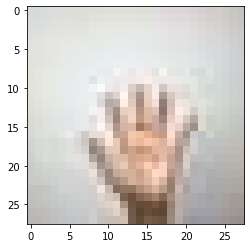

model.predict() 결과 :  [1.7911177e-02 8.3885250e-05 9.8200488e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


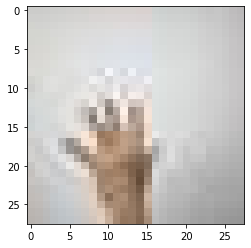

model.predict() 결과 :  [3.1267591e-02 2.2118988e-05 9.6871030e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


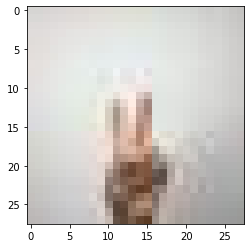

In [121]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

for idx in np.random.choice(len(predicted_labels), 10):
    #idx=150 #1번째 x_test를 살펴보자. 
    print('model.predict() 결과 : ', predicted_result[idx])
    print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
    print('실제 데이터의 라벨 : ', y_test[idx])

    plt.imshow(x_test[idx])
    plt.show()

115  images resized.
124  images resized.
114  images resized.
데이터의 이미지 개수는 353 입니다.


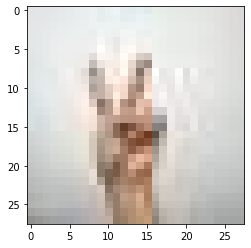

(353, 28, 28, 3)
(353,)


In [140]:
import matplotlib.pyplot as plt

test_image_path = "/aiffel/rock_scissor_paper/test" 
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + test_image_path + "/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + test_image_path + "/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + test_image_path + "/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + test_image_path
(x_test, y_test)=load_data(image_dir_path)

x_test_norm = x_test/255.0

plt.imshow(x_test[10])
plt.show()

print(x_test_norm.shape)
print(y_test.shape)

0


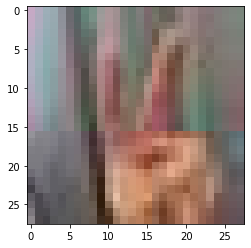

In [43]:
idx = 0
plt.imshow(x_test_norm[idx])
print(y_test[idx])

In [141]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

12/12 - 0s - loss: 0.1124 - accuracy: 0.9490
test_loss: 0.11243551224470139 
test_accuracy: 0.9490085244178772


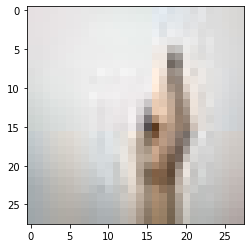

0


In [136]:
idx = 500
plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()
print(y_train[idx])

In [146]:
from PIL import Image
import numpy as np

def save_numpy_images_as_files(numpy_images, base_filename):
    for idx in range(numpy_images.shape[0]):
        image_data = numpy_images[idx]
        
        # NumPy 배열의 데이터 타입을 uint8로 변환합니다. (0~255의 정수 값)
        img_data_uint8 = (image_data * 255).astype(np.uint8)
        
        # NumPy 배열을 PIL 이미지로 변환합니다.
        img = Image.fromarray(img_data_uint8)
        
        # 파일명에 인덱스를 포함하여 이미지를 파일로 저장합니다.
        img.save(f"{base_filename}_{idx}.jpg")

# 선택한 레이블에 따라 이미지를 필터링하고 파일로 저장합니다.
selected_images = x_train[y_train[:, 0] == 0]  # 주의: y_train의 형태에 따라 인덱싱을 조정해야 할 수 있습니다.
save_numpy_images_as_files(selected_images, './scissor/img')

# 선택한 레이블에 따라 이미지를 필터링하고 파일로 저장합니다.
selected_images = x_train[y_train[:, 0] == 1]  # 주의: y_train의 형태에 따라 인덱싱을 조정해야 할 수 있습니다.
save_numpy_images_as_files(selected_images, './rock/img')

# 선택한 레이블에 따라 이미지를 필터링하고 파일로 저장합니다.
selected_images = x_train[y_train[:, 0] == 2]  # 주의: y_train의 형태에 따라 인덱싱을 조정해야 할 수 있습니다.
save_numpy_images_as_files(selected_images, './paper/img')


In [141]:
os.getcwd()

'/aiffel/aiffel/AIFFEL_Quest/AIFFEL_Quest/ML_Quest/MainQuest03'

In [45]:
from PIL import Image
import os

def rotate_and_save_images(folder_path):
    # 폴더 내의 모든 파일에 대해
    for filename in os.listdir(folder_path):
        # 이미지 파일만 대상으로
        if filename.endswith('.jpg') or filename.endswith('.png'):  # 다른 확장자도 추가 가능
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)

            # 90도, 180도, 270도 회전하고 저장
            for angle in [-15, 15, 30, 45]:
                rotated_img = img.rotate(angle)
                new_filename = f"{filename.split('.')[0]}_{angle}.jpg"  # 원본 파일 이름에 각도를 추가
                rotated_img.save(os.path.join(folder_path, new_filename))

# 폴더 경로 지정
#folder_path = '/aiffel/rock_scissor_paper/rock'
rotate_and_save_images('/aiffel/aiffel/rock_scissor_paper/rock')
rotate_and_save_images('/aiffel/aiffel/rock_scissor_paper/paper')
rotate_and_save_images('/aiffel/aiffel/rock_scissor_paper/scissor')
